# 11. Separating Classes with Dividing Lines
[python-course.eu 링크](https://python-course.eu/machine-learning/separating-classes-with-dividing-lines.php)
- A network capable of separating two classes, which are separable by a straight line in a 2-dimensional feature space.


## 1. 구분선

## 평면상의 2개의 점을 원점을 지나는 직선으로 구분하기 
- 직선 위에 점$P=(p_1,p_2)$가 있을 때, 직선의 기울기$(m)$
$$m=\frac{p_2}{p_1}$$
$$mp_1-p_2=0$$

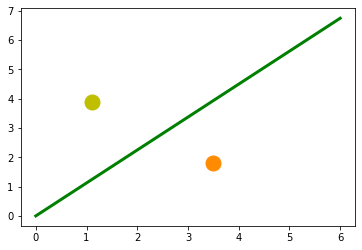

In [11]:
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np

X=np.arange(0,7)

fig, ax = plt.subplots()
# 오렌지 
ax.plot(3.5, 1.8, "o",
        color='darkorange',
        markersize=15)
# 레몬
ax.plot(1.1, 3.9, "oy", # oy = yellow circle marker
        markersize=15)

point_on_line=(4, 4.5)

# 기울기 m 계산
m=point_on_line[1]/point_on_line[0]
ax.plot(X, m*X, "g-", linewidth=3)

plt.show()

- 평면 위의 한 점의 위치:
  - $m\cdot p_1-p_2>0$ 이면, 직선 하단
  - $m\cdot p_1-p_2=0$ 이면, 직선 위 
  - $m\cdot p_1-p_2<0$ 이면, 직선 상단 

In [7]:
orange=(3.5, 1.8)
lemon=(1.1, 3.9)
m=4.5/4

# orange가 직선 하단,위,상단 어디에 위치? 
det=m*orange[0]-orange[1]
if det>0: 
  msg=f'오렌지 determinant는 {det}는 양수. 즉, 직선 하단'
elif det==0:
  msg=f'오렌지 determinant는 {det}는 0. 즉, 직선 위'
elif det<0:
  msg=f'오렌지 determinant는 {det}는 음수. 즉, 직선 상단'
print(msg)

# lemon이 직선 하단,위,상단 어디에 위치? 
det=m*lemon[0]-lemon[1]
if det>0: 
  msg=f'레몬 determinant는 {det}는 양수. 즉, 직선 하단'
elif det==0:
  msg=f'레몬 determinant는 {det}는 0. 즉, 직선 위'
elif det<0:
  msg=f'레몬 determinant는 {det}는 음수. 즉, 직선 상단'
print(msg)

오렌지 determinant는 2.1375는 양수. 즉, 직선 하단
레몬 determinant는 -2.6624999999999996는 음수. 즉, 직선 상단


## 수학계산을 통한 decision boundary 직선과 그렇지 않은 직선 표현 

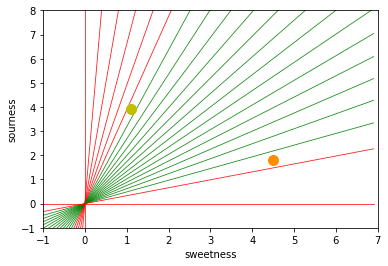

In [9]:
# 직선의 위치 판단하는 함수
def create_distance_function(a,b,c):
  """직선의방정식: ax+by+c=0"""
  def distance(x,y):
    """
    (d, pos) 튜플 반환 
    d는 distance
    pos가 -1이면 점은 직선 하단, 0이면 직선 위, +1이면 직선 상단
    """
    nom=a*x+b*y+c
    if nom==0:
      pos=0
    elif (nom<0 and b<0) or (nom>0 and b>0):
      pos=-1
    else:
      pos=1
    d=np.absolute(nom)/np.sqrt(a**2+b**2)
    return (d, pos)
  return distance

# 평면 및 오렌지,레몬 2개 점 생성
orange=(4.5, 1.8)
lemon=(1.1, 3.9)
fruits_coords=[orange, lemon]

fig,ax = plt.subplots()
ax.set_xlabel("sweetness")
ax.set_ylabel("sourness")
x_min,x_max = -1, 7
y_min,y_max = -1, 8
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
X=np.arange(x_min, x_max, 0.1)

# 직선의 위치에 따라 다른 색으로 plot
step=0.05
for x in np.arange(0, 1+step, step): 
  slope=np.tan(np.arccos(x)) # tan(): tangent / arccos(): cosine의 역수
  dist4line1=create_distance_function(slope, -1, 0)
  Y=slope*X
  results=[]
  for point in fruits_coords:
    results.append(dist4line1(*point))
  if (results[0][1]!=results[1][1]):
    ax.plot(X,Y, "g-", linewidth=0.8, alpha=0.9)
  else:
    ax.plot(X,Y, "r-", linewidth=0.8, alpha=0.9)

# 오렌지, 레몬 plot
size=10
for (index, (x,y)) in enumerate(fruits_coords):
  if index==0:
    ax.plot(x,y,"o",
            color='darkorange',
            markersize=size)
  else:
    ax.plot(x,y,"oy",
            markersize=size)
    
plt.show()

## 여러개 점과 구분선 표현
- randomly creating points within a circle with a defined center point and radius
- 원주율$=l=2\pi r$ <br>
  $2\pi=\frac{l}{r},\ \theta=\frac{l}{r}=rad \text{(라이언트)} →\ \therefore \theta=2\pi$


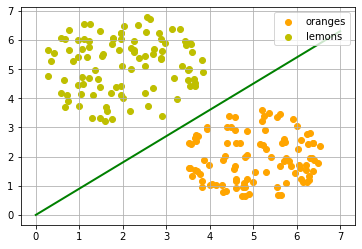

In [90]:
# center를 중심으로한 원 안의 임의의 점을 생성하는 함수
def points_within_circle(radius, center=(0,0), number_of_points=100):
  # center를 중심으로한 원 안의 임의의 점 생성
  center_x, center_y = center
  r=radius * np.sqrt(np.random.random((number_of_points,))) # 반지름 이내의 임의의 길이  
  theta=np.random.random((number_of_points,))*2*np.pi # 2pi(360도) 이내의 임의의 각도
  # 삼각함수 공식을 이용해 해당 점의 (x,y) 계산  
  x=center_x + r*np.cos(theta)
  y=center_y + r*np.sin(theta)
  return x,y

# 오렌지, 레몬 점들 생성
X=np.arange(0,8)
fig,ax = plt.subplots()
oranges_x, oranges_y = points_within_circle(1.6, (5,2), 100) # (5,2)를 중심으로 1.6 반경 내 100개의 오렌지 점 생성
lemons_x, lemons_y = points_within_circle(1.9, (2,5), 100) # (2,5)를 중심으로 1.9 반경 내 100개의 오렌지 점 생성

# 오렌지, 레몬 점들, 구분선 plot
ax.scatter(oranges_x, oranges_y, c='orange', label='oranges')
ax.scatter(lemons_x, lemons_y, c='y', label='lemons')
ax.plot(X, 0.9*X, 'g-', linewidth=2)
ax.legend()
ax.grid()
plt.show() 

# 2. 자동으로 구분선 찾기

## 두 점을 구분하지 못하는 임의의 직선에서 시작

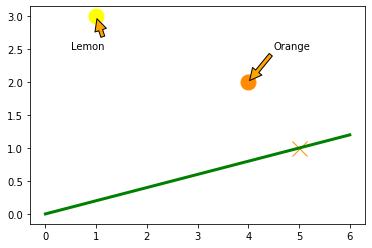

In [16]:
# 
def plot_fruits(p1, p2, point_on_line=(5,1)): #(오렌지점,레몬점,직선위의점)
  X=np.arange(0,7)
  fig,ax=plt.subplots()
  # 오렌지 점
  ax.plot(p1[0], p1[1], 'o',
          color='darkorange',
          markersize=15)
  # 오렌지 화살표 표시 및 글씨
  ax.annotate('Orange', 
              xy=(p1[0],p1[1]), # 화살표 촉 위치
              xytext=(p1[0]+0.5, p1[1]+0.5), # 글씨 시작 위치
              arrowprops=dict(facecolor='orange', shrink=0.05)) # shrink: 화살표 꼬리 길이 제어 (숫자 클수록 꼬리가 짧아짐)
  # 레몬 점
  ax.plot(p2[0], p2[1], 'o',
          color='yellow',
          markersize=15)
  # 레몬 화살표 표시 및 글씨
  ax.annotate('Lemon', 
              xy=(p2[0],p2[1]), # 화살표 촉 위치
              xytext=(p2[0]-0.5, p2[1]-0.5), # 글씨 시작 위치
              arrowprops=dict(facecolor='orange', shrink=0.1)) # shrink: 화살표 꼬리 길이 제어 (숫자 클수록 꼬리가 짧아짐)
  # 직선 위의 점에 X 표시
  ax.plot(*point_on_line, 'x',  
          color='darkorange',
          markersize=15)
  # 직선 기울기 계산:
  m=point_on_line[1]/point_on_line[0]
  ax.plot(X, m*X, 'g-', linewidth=3)

  plt.show()

orange=(4,2)
lemon=(1,3)
point=(5,1)
plot_fruits(p1=orange, p2=lemon, point_on_line=point)

## 에러 계산 
- 앞선 직선을 구분선으로 만들어주려면 직선 위에 orange가 있다고 가정한 상태에서 직선의 기울기를 더 가파르게 해야함 
- 타깃 기울기 = 기존 기울기 + 에러

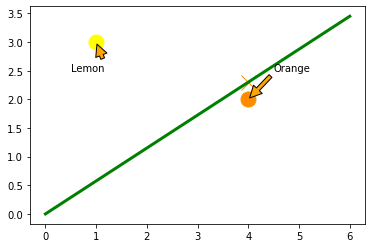

오렌지 determinant 0.2999999999999998는 양수. 즉, 직선 하단


In [19]:
# orange가 직선 위에 놓인 상태에서 직선의 기울기를 더 가파르게 만들기
delta=0.3
plot_fruits(p1=orange, p2=lemon, point_on_line=(4,2+delta))

new_slope=(2+delta)/4
det=new_slope*orange[0]-orange[1]
if det>0: 
  msg=f'오렌지 determinant {det}는 양수. 즉, 직선 하단'
elif det==0:
  msg=f'오렌지 determinant {det}는 0. 즉, 직선 위'
elif det<0:
  msg=f'오렌지 determinant {det}는 음수. 즉, 직선 상단'
print(msg)

In [20]:
#
targeted_slope=new_slope
initial_slope=point[1]/point[0]
error=targeted_slope-initial_slope

# 타깃 기울기 = 기존 기울기 + 에러
initial_slope + error

0.575

## 여러개 점에 correction mechanism 적용 

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

number_of_samples=9
centers=[(1, 1.5), (1.5,1)] # (lemon, orange)
data, labels = make_blobs(n_samples=number_of_samples,
                          cluster_std=0.2, 
                          centers=np.array(centers),
                          random_state=42)

# 생성된 점들 확인
## (x,y), 라벨 묶기
fruits=[(data[i], labels[i]) for i in range(len(data))]
fruits

[(array([1.12953771, 1.80460597]), 0),
 (array([1.40731646, 0.90685405]), 1),
 (array([0.90610512, 1.60851201]), 0),
 (array([1.29743378, 1.06284947]), 1),
 (array([1.09934283, 1.47234714]), 0),
 (array([1.15501643, 0.88754249]), 1),
 (array([1.54839245, 0.61734395]), 1),
 (array([1.31584256, 1.65348695]), 0),
 (array([0.95316933, 1.45317261]), 0)]

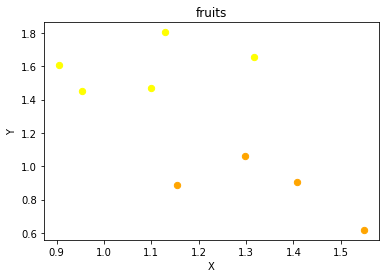

In [59]:
# 시각화
fig,ax=plt.subplots()
colours=['yellow', 'orange']
label_name=['Lemons','Oranges']
## labels가 0(레몬)일 때와 1(오렌지)일 때의 x,y 표시
for label in range(0,2):
  ax.scatter(data[labels==label, 0],  # labels==0 : array([ True, False,  True, False,  True, False, False,  True,  True])
             data[labels==label, 1],
             c=colours[label],
             s=40,
             label=label_name[label])
ax.set(xlabel='X', ylabel='Y', title='fruits')
plt.show()

0.3 0.41544252971893364
0.7154425297189336 1.4073164614375075 0.9068540492859486
0.7154425297189336 0.1808263111956887
0.8962688409146223 1.2974337759331152 1.0628494665190549
The final value for the slope: 0.8962688409146223


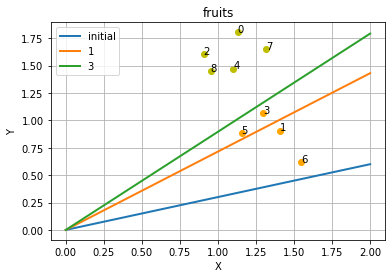

In [65]:
# correction machanism
def adjust(slope=0.3):
  line=None  
  delta=0.1  # 기울기 조정할 step size
  cnt=-1     # 몇번째 조정인지 카운트
  # 각 점에 대해 직선과의 위치 확인하면서 조정
  for ((x,y), label) in zip(data, labels):
    cnt+=1
    ax.scatter(x,y,
               color='y' if label==0 else 'orange')
    # (x,y) 위치에 몇번째 조정인지 cnt 표기
    ax.annotate(str(cnt), (x,y)) 

    det=slope*x -y
    target_slope=(y+delta)/x
    error=(target_slope-slope)

    # print(label, pos2line)
    if label==1 and det<0:
      # label 1 오렌지는 직선 하단에 있어야 하는데 det<0으로 직선 상단에 위치
      # => 따라서, 기울기 높여야 함
      print(slope, error)
      slope+=error
      print(slope,x,y)
      ax.plot(X, slope*X,
              linewidth=2, label=str(cnt))
    elif label==0 and det>0:
      # label 0 레몬은 직선 상단에 있어야 하는데 det>0으로 직선 하단에 위치
      # => 따라서, 기울기 낮춰야 함
      print(slope, error)
      slope+=error
      print(slope,x,y)   
      ax.plot(X, slope*X,
              linewidth=2, label=str(cnt))   
  return slope

X=np.arange(0,3)
fig,ax=plt.subplots()
ax.set(xlabel='X', ylabel='Y', title='fruits')

slope=0.3  # initial slope
ax.plot(X, slope*X,
        linewidth=2,
        label='initial')
slope=adjust(slope)
ax.legend()
ax.grid()

print(f'The final value for the slope: {slope}')
plt.show()

## outlier가 존재할 때 구분선 

### 아웃라이어 생성

[Text(0, 0.5, 'Y'), Text(0.5, 0, 'X'), Text(0.5, 1.0, 'fruits')]

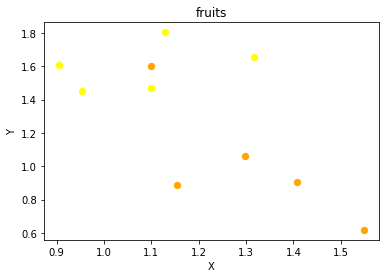

In [81]:
data=np.concatenate((data, np.array([[1.1, 1.6]])))
labels=np.concatenate((labels, np.array([1]))) 

fig, ax = plt.subplots()
colours = ["yellow", "orange"]
label_name = ["Lemons", "Oranges"]
for label in range(0, 2):
  ax.scatter(data[labels==label, 0], 
             data[labels==label, 1], 
             c=colours[label], 
             s=40, 
             label=label_name[label])

ax.set(xlabel='X', ylabel='Y', title='fruits')

### 기존의 correction machanism은 아웃라이어에 크게 반응함

0.3 0.41544252971893364
0.7154425297189336 1.4073164614375075 0.9068540492859486
0.7154425297189336 0.1808263111956887
0.8962688409146223 1.2974337759331152 1.0628494665190549
0.8962688409146223 0.6491857045399231
1.5454545454545454 1.1 1.6
The final value for the slope: 1.5454545454545454


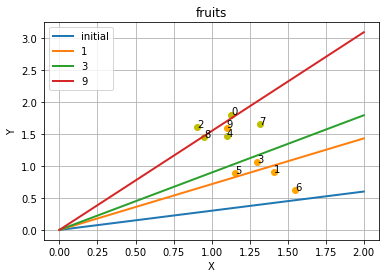

In [82]:
fig, ax = plt.subplots()
ax.set(xlabel='X', ylabel='Y', title='fruits')

start_slope = 0.3
ax.plot(X, 
        start_slope * X,  
        linewidth=2,
        label="initial")
slope = adjust(start_slope)

ax.legend()
ax.grid()
print(f'The final value for the slope: {slope}')
plt.show()

### error 전체가 아닌 learning rate 반영한 만큼만 조정

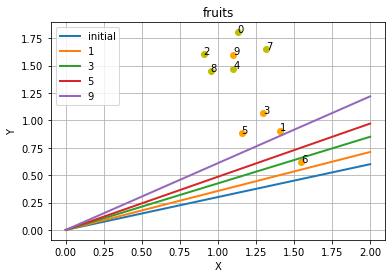

0.609691601006235


In [83]:
# learning rate 반영해서 기울기 업데이트 하는 함수
def adjust(slope=0.3, learning_rate=0.3):
    line = None
    delta = 0.3   # 기울기 조정할 step size
    counter = -1  # 몇번째 조정인지 카운트
  # 각 점에 대해 직선과의 위치 확인하면서 조정
    for ((x, y), label) in zip(data, labels):   
        counter += 1 
        ax.scatter(x, y,
                   color="y" if label == 0 else "orange")
        ax.annotate(str(counter), (x, y))
 
        det = slope * x - y
        target_slope = (y + delta) / x
        error = (target_slope - slope) 
        if label == 1 and det < 0:
            # point is above line but should be below 
            # => increment slope
            slope += error * learning_rate
            ax.plot(X, slope * X, 
                    linewidth=2, label=str(counter))

        elif label == 0 and det > 0:
            # point is below line but should be above 
            # => decrement slope
            slope += error * learning_rate
            ax.plot(X, slope * X,  
                    linewidth=2, label=str(counter))
    return slope

fig, ax = plt.subplots()
ax.set(xlabel='X', ylabel='Y', title='fruits')

learning_rate, start_slope = 0.1, 0.3
ax.plot(X, 
        start_slope * X,  
        linewidth=2,
        label="initial")
slope = adjust(start_slope, learning_rate)

ax.legend()
ax.grid()
plt.show()

print(slope)

=> learning rate가 너무 작아서 적절한 구분선을 그리지 못함 <br>
=> 횟수 늘려서 더 많이 시도 

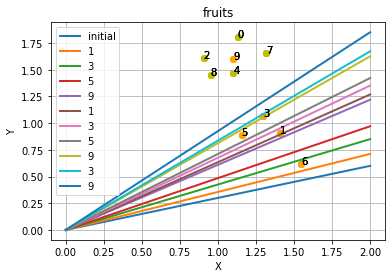

0.9256980198268796


In [86]:
fig, ax = plt.subplots()
ax.set(xlabel='X', ylabel='Y', title='fruits')

learning_rate, start_slope = 0.1, 0.3
ax.plot(X, 
        start_slope * X,  
        linewidth=2,
        label="initial")
slope = adjust(start_slope, learning_rate)
# 두번 더 진행
slope = adjust(slope, learning_rate)
slope = adjust(slope, learning_rate)

ax.legend()
ax.grid()
plt.show()

print(slope)

=> 완성! <br>
=> **이런 아이디어가 simple neural networks에도 나타남** 

# 3. A Simple Neural Network
- 뉴런이 1개인 simple neural network
- 2개의 입력값(sourness, sweetness)을 받아서 결과 예측 (레몬인지, 오렌지인지) 
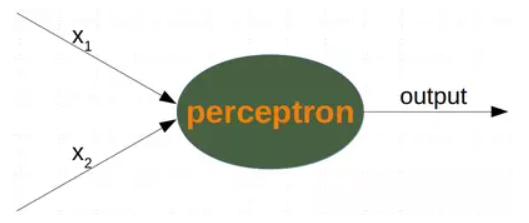

## Perceptron 클래스 생성

In [87]:
import numpy as np

# 퍼셉트론 클래스 생성
class Perceptron:
    
    def __init__(self, weights):
        """
        'weights'는 actual values of the weights가 있는 numpy array, list 또는 tuple 
        입렵값의 개수는 'wights'의 개수에 따라 정의됨 
        """
        self.weights = np.array(weights)
    
    # weights와 입력값의 가중합
    def __call__(self, in_data): 
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return weighted_sum

In [88]:
p = Perceptron(weights=[-0.45, 0.5])
p([2.9, 4]) # 2.9*(-0.45)+4*(0.5)

0.6950000000000001

## 퍼셉트론에 lemons, oranges 데이터 입력 
- 오렌지를 입력하면 음수값, 레몬을 입력하면 양수값이 반환됨 

In [91]:
for point in zip(oranges_x[:10], oranges_y[:10]):
    res = p(point)
    print(res, end=", ")

for point in zip(lemons_x[:10], lemons_y[:10]):
    res = p(point)
    print(res, end=", ")

-2.039049487770442, -1.3497691320860288, -1.215920335650737, -0.9209195805564185, -1.4068116619445568, -1.8121883317805307, -0.8426715769829534, -1.5984485781410418, -1.8514323324158144, -1.2335218435457052, 1.773599182492244, 1.456309319098885, 0.9550858736705692, 1.7493356539067775, 0.6995673278913961, 0.9197186606281011, 0.7135365539193828, 2.723602890430443, 1.5510227178034195, 2.587284698834183, 

- 몇개를 맞췄는지 확인 

In [92]:
from collections import Counter

evaluation = Counter()
# 오렌지 점을 입력해서 음수값을 반환하면 'corrects'
for point in zip(oranges_x, oranges_y):
    res = p(point)
    if res < 0:
        evaluation['corrects'] += 1
    else:
        evaluation['wrongs'] += 1

# 레몬 점을 입력해서 양수값을 반환하면 'corrects'
for point in zip(lemons_x, lemons_y):
    res = p(point)
    if res >= 0:
        evaluation['corrects'] += 1
    else:
        evaluation['wrongs'] += 1

print(evaluation)

Counter({'corrects': 200})


## 퍼셉트론 계산식 
- 출력값=0 이라고 하면: 
$$w_1\cdot x_1+w_2\cdot x_2=0$$
$$⟹ x_2=-\frac{w_1}{w_2}\cdot x_1$$
  - 이는 기울기가 $-\frac{w_1}{w_2}$이고 y절편이 0인 직선
  - 따라서 이 출력값이 양수이면, 직선 상단에 위치 (즉, 레몬)
  - 이 출력값이 음수이면, 직선 하단에 위치 (즉, 오렌지)

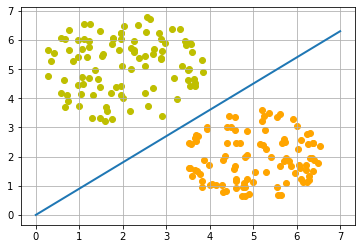

0.9


In [96]:
import time
import matplotlib.pyplot as plt

slope = 0.1
weight_1=-0.45
weight_2=0.5

X = np.arange(0, 8)
fig, ax = plt.subplots()
ax.scatter(oranges_x, 
           oranges_y, 
           c="orange", 
           label="oranges")
ax.scatter(lemons_x, 
           lemons_y, 
           c="y", 
           label="lemons")

slope = -(weight_1/weight_2)
ax.plot(X, slope * X,  linewidth=2)

ax.grid()
plt.show()

print(slope)

# 4. Training a Neural Network

In [97]:
# train, test 분리

from sklearn.model_selection import train_test_split
import random

oranges = list(zip(oranges_x, oranges_y))
lemons = list(zip(lemons_x, lemons_y))

# labelling oranges with 0 and lemons with 1:
labelled_data = list(zip(oranges + lemons, 
                         [0] * len(oranges) + [1] * len(lemons)))
random.shuffle(labelled_data)

data, labels = zip(*labelled_data)

res = train_test_split(data, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=42)
train_data, test_data, train_labels, test_labels = res    
print(train_data[:10], train_labels[:10])

[(4.047153338534171, 1.0564021895272355), (2.9659465544618846, 5.890815565952907), (3.945159642443242, 3.028376894819818), (5.549110015879498, 3.363935131247459), (5.561673072720187, 0.6783480141776592), (5.201215683697842, 3.5831438310313217), (4.9861151191781925, 1.1437762822186461), (6.543577990728671, 2.359766588083541), (4.586789766691741, 2.928568707777531), (4.306874029424228, 1.898656803718122)] [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]


## weights training
- error를 확인하면서 weight의 값을 조금씩 수정 
- learning rate의 크기에 따라서 값이 작으면 학습이 오래걸리고 값이 크면 sub-optimal 값으로 수렴할 수 있음 (backpropagation 챕터에서 자세히 다룸) 

*정적메서드 1) @staticmethod 2) @classmethod
- 공통점 : 객체를 만들지 않아도 class의 메서드를 바로 실행할 수 있음
- 차이점 : @classmethod 는 'cls' 파라미터가 있어서 클래스속성을 좀 터 편하게 사용할 수 있음

In [106]:
class Perceptron:
    
    def __init__(self, 
                 weights,
                 learning_rate=0.1):
        """
        'weights'는 actual values of the weights가 있는 numpy array, list 또는 tuple 
        입렵값의 개수는 'wights'의 개수에 따라 정의됨 
        """
        self.weights = np.array(weights)
        self.learning_rate = learning_rate
     
    # activation function:
    @staticmethod # 정적메서드
    def unit_step_function(x):
        if  x < 0:
            return 0
        else:
            return 1
        
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return Perceptron.unit_step_function(weighted_sum)
    
    def adjust(self, 
               target_result, 
               calculated_result,
               in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data)  
        error = target_result - calculated_result
        if error != 0:
            correction = error * in_data * self.learning_rate
            self.weights += correction 
            
    def evaluate(self, data, labels):
        evaluation = Counter()
        for index in range(len(data)):
            label = int(round(p(data[index]),0))
            if label == labels[index]:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation
                

p = Perceptron(weights=[0.1, 0.1],
               learning_rate=0.3)

for index in range(len(train_data)):
    p.adjust(train_labels[index], 
             p(train_data[index]), 
             train_data[index])
    
evaluation = p.evaluate(train_data, train_labels)
print(evaluation.most_common())
evaluation = p.evaluate(test_data, test_labels)
print(evaluation.most_common())

print(p.weights)

[('correct', 160)]
[('correct', 40)]
[-2.26143911  1.99895529]


In [107]:
len(train_data), len(test_data) # 모든 데이터 correct

(160, 40)

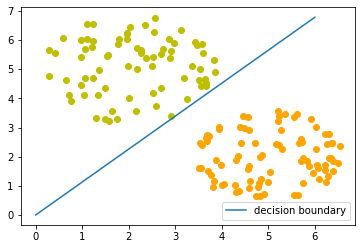

[-2.26143911  1.99895529]


In [108]:
# 시각화

X = np.arange(0, 7)
fig, ax = plt.subplots()

lemons = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 1]
lemons_x, lemons_y = zip(*lemons)
oranges = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 0]
oranges_x, oranges_y = zip(*oranges)

ax.scatter(oranges_x, oranges_y, c="orange")
ax.scatter(lemons_x, lemons_y, c="y")

w1 = p.weights[0]
w2 = p.weights[1]
m = -w1 / w2
ax.plot(X, m * X, label="decision boundary")
ax.legend()
plt.show()
print(p.weights)

## 학습되는 모습 확인

0 -54.025444119731524 [-0.30471533 -0.00564022] (4.047153338534171, 1.0564021895272355)
1 0.013918585954229373 [-0.00812068  0.58344134] (2.9659465544618846, 5.890815565952907)
2 1.4348945400065856 [-0.40263664  0.28060365] (3.945159642443242, 3.028376894819818)
11 0.04858959035304443 [-0.03563553  0.73339845] (3.6700111247175764, 4.527948003727933)
15 1.1695726302591605 [-0.65757145  0.56223225] (6.219359190252886, 1.7116620045197863)
150 0.40742736998004386 [-0.36690629  0.90054403] (2.906651636637821, 3.383117815434954)


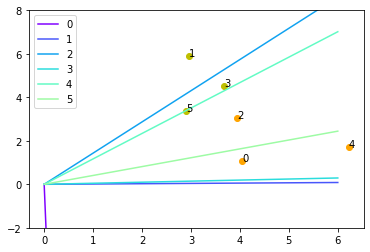

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm  

p = Perceptron(weights=[0.1, 0.1],
               learning_rate=0.1)
number_of_colors = 10
colors = cm.rainbow(np.linspace(0, 1, number_of_colors))  # cm: colormap # np.linspace(start,end,interval): range를 interval개로 분할

fig, ax = plt.subplots()
ax.set_xticks(range(8))
ax.set_ylim([-2, 8])

counter = 0
for index in range(len(train_data)):
    old_weights = p.weights.copy()
    p.adjust(train_labels[index], 
             p(train_data[index]), 
             train_data[index])
    # 기존 가중치와 업데이트한 가중치가 동일하지 않다면 그래프 그리기
    if not np.array_equal(old_weights, p.weights):
        color = "orange" if train_labels[index] == 0 else "y"        
        ax.scatter(train_data[index][0], 
                   train_data[index][1],
                   color=color)
        ax.annotate(str(counter), 
                    (train_data[index][0], train_data[index][1]))
        m = -p.weights[0] / p.weights[1]
        print(index, m, p.weights, train_data[index])
        ax.plot(X, m * X, label=str(counter), color=colors[counter])
        counter += 1
ax.legend()
plt.show()